# Customer Invoices Cohort Retention Analysis

#### TEAM
- Zia Tabaruk
- Faizal Lutfi Yoga Triadi
- Dzaky Muhammad Baihaqi

## Business Understanding

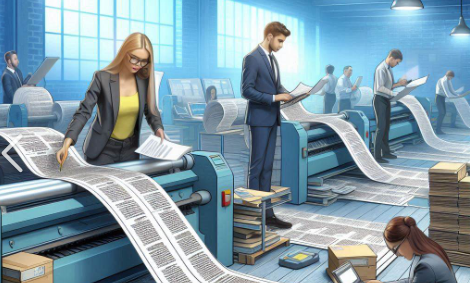

### Latar Belakang :
Pengelolaan pembayaran invoice merupakan bagian penting dari operasional keuangan perusahaan. Dalam bisnis, pengelolaan cash flow dan arus kas sangat penting untuk memastikan kelancaran operasi dan kesehatan keuangan perusahaan. Mengetahui kapan pembayaran invoice akan dilakukan dapat membantu perusahaan dalam merencanakan cash flow, mengoptimalkan proses penagihan, dan mengurangi risiko piutang tak tertagih.    

### Stakeholders (Pihak yang berkepentingan) :
Pihak Terkait:
1.	Tim Keuangan: Menggunakan prediksi tanggal pembayaran untuk mengelola arus kas dan merencanakan kebutuhan keuangan perusahaan.
2.	Tim Penjualan dan Penagihan: Mengoptimalkan proses penagihan dan mengidentifikasi pelanggan yang membutuhkan perhatian khusus.
3.	Manajemen Eksekutif: Membutuhkan laporan dan analisis untuk membuat keputusan strategis terkait manajemen arus kas dan kebijakan kredit.

Dataset ini tersedia di Kaggle:  [Payment Date Prediction for Invoices Dataset](https://www.kaggle.com/datasets/pradumn203/payment-date-prediction-for-invoices-dataset).

### Permasalahan :
Perusahaan mengalami kesulitan dalam memprediksi tanggal pembayaran invoice, yang menyebabkan ketidakpastian dalam pengelolaan arus kas. Ketidakpastian ini dapat mempengaruhi operasional bisnis dan keputusan strategis yang bergantung pada ketersediaan dana.

### Tujuan :
Tujuan perusahaan adalah untuk menganalisis retensi cohort dan mengidentifikasi tren pembelian dari waktu ke waktu. Dengan analisis ini, perusahaan berharap dapat meningkatkan akurasi prediksi pembayaran invoice dan mengoptimalkan manajemen arus kas.

### Data Understanding
Dataset terdiri dari beberapa kolom utama yang relevan dengan analisis ini:
1. Invoice ID
2. Customer ID
3. Invoice Date
4. Payment Date
5. Invoice Amount
Analisis data ini akan difokuskan pada retensi cohort, yaitu mengelompokkan pelanggan berdasarkan bulan pertama mereka melakukan transaksi dan menganalisis perilaku mereka dari waktu ke waktu.

### Data Preparation
Langkah-langkah persiapan data meliputi:
1. Mengimpor dataset dan library yang diperlukan.
2. Melakukan pemeriksaan awal terhadap data untuk memahami struktur dan isinya.
3. Membersihkan data dengan menghapus atau mengisi nilai yang hilang dan memastikan konsistensi format data.
4. Mengelompokkan data berdasarkan cohort dan menghitung metrik retensi.

### Data Analysis :
Analisis retensi cohort dilakukan dengan beberapa langkah berikut:
1. **Pembuatan Cohort** : Mengelompokkan pelanggan berdasarkan bulan pertama mereka melakukan transaksi.
2. **Analisis Retensi** : Menghitung jumlah pelanggan yang melakukan transaksi kembali pada bulan-bulan berikutnya.
3. **Visualisasi dengan Heatmap** : Membuat pivot table untuk visualisasi retensi cohort.
4. **Analisis Tren** : Menganalisis tren retensi dari waktu ke waktu dan mengidentifikasi pola atau anomali.


## 1. Import Data
Langkah pertama adalah mengimpor dataset dan library yang dibutuhkan untuk analisis.

In [5]:
# Import libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

## 2. Analisis Cohort: Persiapan Data

Untuk visualisasi data yang tepat untuk analisis retensi per kelompok cohort, kita harus mengubah data mentah menjadi bentuk berikut:
> cohort_month | current_month | count_user | period_distance

1. **cohort_month**: Bulan aktivitas pertama pelanggan melakukan pelunasan transaksi (waktu pelunasan transaksi pertama)
2. **current_month**: Bulan observasi (bulan transaksi dalam data)
3. **count_user**: Jumlah pelanggan berdasarkan cohort_month dan period_distance
4. **period_distance**: Jarak antara cohort_month dengan current_month


In [6]:
retention = pd.read_csv('dataset.csv',
                        parse_dates=['clear_date'])

# drop useless column
retention.drop(['area_business', 'invoice_id', 'isOpen'], axis=1, inplace=True)

# drop na
retention.dropna(inplace=True)
retention.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
dtype: int64

In [7]:
retention['cust_number'].value_counts()

cust_number
0200769623    8942
0200726979    1519
0200762301    1171
0200759878    1075
0200794332     901
              ... 
200306844        1
200775660        1
0140105192       1
0200389625       1
0200541916       1
Name: count, Length: 1344, dtype: int64

In [8]:
retention.head(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,54273.28,20200126.0,NAH4
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,79656.60,20190722.0,NAD1
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,2253.86,20190914.0,NAA8
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,33133.29,20191113.0,NAH4
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,22225.84,20190924.0,CA10
6,U001,0200769623,WAL-MAR in,2019-11-12,2019.0,1.930083e+09,2019-11-01,20191031,20191101,20191116.0,USD,RV,1.0,7358.49,20191101.0,NAH4
8,U001,0200769623,WAL-MAR corp,2019-06-18,2019.0,1.929440e+09,2019-06-07,20190605,20190607,20190622.0,USD,RV,1.0,15995.04,20190607.0,NAH4
9,U001,0200762301,C&S WH systems,2019-03-06,2019.0,1.928819e+09,2019-02-20,20190219,20190220,20190307.0,USD,RV,1.0,28.63,20190220.0,NAC6
11,U001,0200743129,BROOKS co,2019-01-22,2019.0,1.928551e+09,2019-01-02,20190102,20190102,20190117.0,USD,RV,1.0,103147.37,20190102.0,NAA8
12,U001,0200186937,SYSC corporation,2019-05-06,2019.0,1.929152e+09,2019-04-15,20190415,20190415,20190430.0,USD,RV,1.0,16381.45,20190415.0,NAA8


## 3. Membuat Tabel Cohort

Kita membuat tabel cohort dengan mempivot data sehingga kita bisa menganalisis retensi pelanggan dari waktu ke waktu.


In [9]:
# step 1
# define cohort month
retention['cohort_month'] = retention.groupby('cust_number')['clear_date'].transform('min').dt.to_period('M')
retention.sample(10)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,cohort_month
23470,U001,0200772670,ASSOCIAT corporation,2019-12-27,2019.0,1.930268e+09,2019-12-11,20191211,20191211,20191226.0,USD,RV,1.0,78962.89,20191211.0,NAU5,2019-01
43697,U001,0200915438,GROC co,2019-06-25,2019.0,1.929431e+09,2019-06-10,20190604,20190610,20190625.0,USD,RV,1.0,36864.00,20190610.0,NAA8,2019-01
13360,U001,0200793513,KROGER,2019-12-17,2019.0,1.930209e+09,2019-12-02,20191202,20191202,20191217.0,USD,RV,1.0,34261.84,20191202.0,NAA8,2019-01
36346,U001,0200148860,DOLLA foundation,2019-06-19,2019.0,1.929423e+09,2019-06-04,20190603,20190604,20190619.0,USD,RV,1.0,89099.38,20190604.0,NAA8,2019-01
255,U001,0200705742,DOT,2019-02-13,2019.0,1.928680e+09,2019-01-24,20190124,20190124,20190213.0,USD,RV,1.0,113.47,20190124.0,NAD1,2019-01
29214,U001,0200726979,BJ'S us,2019-07-15,2019.0,1.929560e+09,2019-06-30,20190629,20190630,20190715.0,USD,RV,1.0,231.31,20190630.0,NAA8,2019-01
1893,U001,0200793568,SUPE co,2019-12-31,2019.0,1.930281e+09,2019-12-13,20191214,20191213,20191228.0,USD,RV,1.0,119816.03,20191213.0,NAA8,2019-01
22097,U001,0200769623,WAL-MAR systems,2019-02-25,2019.0,1.928796e+09,2019-02-14,20190214,20190214,20190301.0,USD,RV,1.0,10483.01,20190214.0,NAH4,2019-01
44966,U001,0200700919,US us,2019-11-26,2019.0,1.930099e+09,2019-11-04,20191104,20191104,20191119.0,USD,RV,1.0,39675.03,20191104.0,NAA8,2019-01
36263,CA02,0140104409,LOB llc,2019-11-15,2019.0,2.960589e+09,2019-10-28,20191028,20191028,20191115.0,CAD,RV,1.0,134547.21,20191105.0,CA10,2019-01


In [10]:
# step 2
# define current_transaction_month
retention['current_transaction_month'] = retention['clear_date'].dt.to_period('M')
retention = retention[['cust_number', 'cohort_month', 'current_transaction_month']]
retention.drop_duplicates(inplace=True)
retention.head(10)

,cust_number,cohort_month,current_transaction_month
0,0200769623,2019-01,2020-02
1,0200980828,2019-01,2019-08
2,0200792734,2019-01,2019-12
4,0200769623,2019-01,2019-11
5,0140106181,2019-02,2019-12
8,0200769623,2019-01,2019-06
9,0200762301,2019-01,2019-03
11,0200743129,2019-01,2019-01
12,0200186937,2019-01,2019-05
13,0200721222,2019-01,2019-11


In [11]:
# step 3
# agregasi
cohort_retention = retention.groupby(['cohort_month', 'current_transaction_month'])['cust_number'].count().reset_index().rename(columns={'cust_number': 'count_user'})
cohort_retention.head(10)

,cohort_month,current_transaction_month,count_user
0,2019-01,2019-01,232
1,2019-01,2019-02,167
2,2019-01,2019-03,179
3,2019-01,2019-04,174
4,2019-01,2019-05,183
5,2019-01,2019-06,173
6,2019-01,2019-07,170
7,2019-01,2019-08,172
8,2019-01,2019-09,175
9,2019-01,2019-10,181


In [12]:
# step 4
from operator import attrgetter

# define period_distance (month distance)
cohort_retention['period_distance'] = (cohort_retention['current_transaction_month'] - cohort_retention['cohort_month']).apply(attrgetter('n'))
cohort_retention.head(10)

,cohort_month,current_transaction_month,count_user,period_distance
0,2019-01,2019-01,232,0
1,2019-01,2019-02,167,1
2,2019-01,2019-03,179,2
3,2019-01,2019-04,174,3
4,2019-01,2019-05,183,4
5,2019-01,2019-06,173,5
6,2019-01,2019-07,170,6
7,2019-01,2019-08,172,7
8,2019-01,2019-09,175,8
9,2019-01,2019-10,181,9


In [13]:
# step 5
# pivot
cohort_retention_pivot = cohort_retention.pivot_table(index='cohort_month', columns='period_distance', values='count_user')
cohort_retention_pivot

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort_month,,,,,,,,,,,,,,,,,
2019-01,232.0,167.0,179.0,174.0,183.0,173.0,170.0,172.0,175.0,181.0,175.0,168.0,144.0,166.0,137.0,31.0,5.0
2019-02,247.0,90.0,120.0,101.0,98.0,100.0,96.0,73.0,78.0,83.0,87.0,44.0,67.0,55.0,10.0,4.0,NaN
2019-03,185.0,73.0,60.0,60.0,64.0,54.0,43.0,37.0,40.0,39.0,17.0,30.0,18.0,8.0,1.0,NaN,NaN
2019-04,178.0,32.0,36.0,42.0,30.0,22.0,17.0,18.0,17.0,14.0,16.0,17.0,6.0,1.0,NaN,NaN,NaN
2019-05,89.0,10.0,23.0,20.0,10.0,18.0,13.0,12.0,4.0,9.0,7.0,2.0,1.0,NaN,NaN,NaN,NaN
2019-06,66.0,15.0,15.0,11.0,7.0,8.0,13.0,4.0,7.0,3.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN
2019-07,100.0,8.0,4.0,9.0,5.0,8.0,3.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,53.0,6.0,4.0,8.0,5.0,2.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,34.0,5.0,9.0,2.0,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# step 6
# convert to percentage
cohort_retention_final = cohort_retention_pivot.divide(cohort_retention_pivot.iloc[:, 0], axis=0)
cohort_retention_final.iloc[6, 10] = 0
cohort_retention_final.iloc[6, 9] = 0
cohort_retention_final.iloc[7, 9] = 0
cohort_retention_final.iloc[8, 8] = 0
cohort_retention_final.iloc[8, 7] = 0
cohort_retention_final.iloc[9, 7] = 0
cohort_retention_final.iloc[10, 5] = 0
cohort_retention_final.iloc[10, 6] = 0
cohort_retention_final.iloc[11, 4] = 0
cohort_retention_final.iloc[11, 5] = 0
cohort_retention_final.iloc[12, 2] = 0
cohort_retention_final.iloc[12, 3] = 0
cohort_retention_final.iloc[12, 4] = 0
cohort_retention_final.iloc[13, 3] = 0
cohort_retention_final.iloc[13, 2] = 0
cohort_retention_final.iloc[14, 2] = 0
cohort_retention_final.iloc[14, 1] = 0
cohort_retention_final.iloc[15, 1] = 0


cohort_retention_final

period_distance,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cohort_month,,,,,,,,,,,,,,,,,
2019-01,1.0,0.719828,0.771552,0.750000,0.788793,0.745690,0.732759,0.741379,0.754310,0.780172,0.754310,0.724138,0.620690,0.715517,0.590517,0.133621,0.021552
2019-02,1.0,0.364372,0.485830,0.408907,0.396761,0.404858,0.388664,0.295547,0.315789,0.336032,0.352227,0.178138,0.271255,0.222672,0.040486,0.016194,NaN
2019-03,1.0,0.394595,0.324324,0.324324,0.345946,0.291892,0.232432,0.200000,0.216216,0.210811,0.091892,0.162162,0.097297,0.043243,0.005405,NaN,NaN
2019-04,1.0,0.179775,0.202247,0.235955,0.168539,0.123596,0.095506,0.101124,0.095506,0.078652,0.089888,0.095506,0.033708,0.005618,NaN,NaN,NaN
2019-05,1.0,0.112360,0.258427,0.224719,0.112360,0.202247,0.146067,0.134831,0.044944,0.101124,0.078652,0.022472,0.011236,NaN,NaN,NaN,NaN
2019-06,1.0,0.227273,0.227273,0.166667,0.106061,0.121212,0.196970,0.060606,0.106061,0.045455,0.045455,0.015152,NaN,NaN,NaN,NaN,NaN
2019-07,1.0,0.080000,0.040000,0.090000,0.050000,0.080000,0.030000,0.030000,0.040000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,1.0,0.113208,0.075472,0.150943,0.094340,0.037736,0.056604,0.018868,0.018868,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,1.0,0.147059,0.264706,0.058824,0.117647,0.029412,0.029412,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 5. Visualisasi Retensi dengan Heatmap

Heatmap retensi memberikan representasi visual tentang bagaimana tingkat retensi berubah dari waktu ke waktu untuk berbagai cohort. Ini membantu mengidentifikasi tren dan pola dalam perilaku pelanggan.

### Cara Membaca Heatmap:
- Sumbu Y menunjukkan cohort berdasarkan bulan pertama pelanggan melakukan transaksi.
- Sumbu X menunjukkan jumlah bulan sejak pembelian pertama.
- Warna pada heatmap menunjukkan tingkat retensi, dengan warna yang lebih gelap menunjukkan retensi yang lebih tinggi.


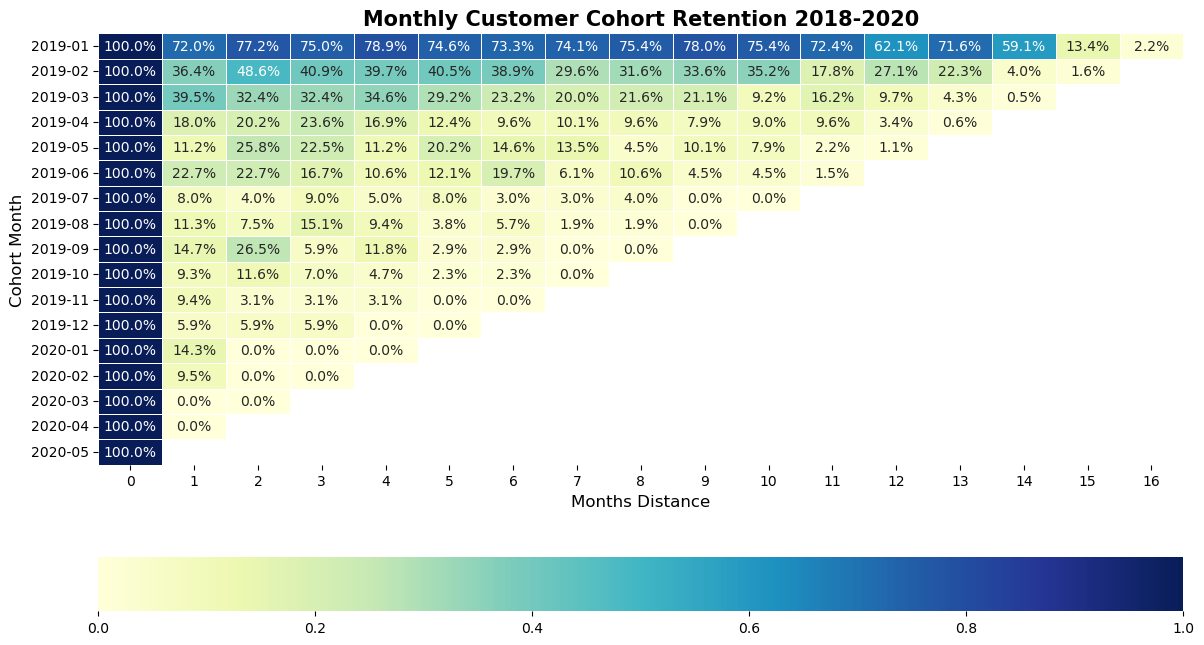

In [15]:
# create heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(cohort_retention_final, cmap='YlGnBu', annot=True, fmt='.1%', cbar_kws={'orientation': 'horizontal'}, linewidths=0.5, linecolor='white', vmin=0, vmax=1)
plt.title('Monthly Customer Cohort Retention 2018-2020', fontsize=15, fontweight='bold')
plt.xlabel('Months Distance', fontsize=12)
plt.ylabel('Cohort Month', fontsize=12)
plt.show()

In [16]:
# step 1 alternatively
lineplot1 = cohort_retention_final.reset_index().melt(id_vars='cohort_month', value_name='percentage', var_name='period_distance')
lineplot1.sample(10)

,cohort_month,period_distance,percentage
19,2019-03,1,0.394595
72,2019-05,4,0.112360
138,2019-03,8,0.216216
178,2019-09,10,NaN
116,2020-03,6,NaN
161,2019-09,9,NaN
34,2019-01,2,0.771552
274,2019-03,16,NaN
234,2020-02,13,NaN
284,2020-01,16,NaN


## 6. Visualisasi Retensi rate dan churn rate dengan Line Plot

Line plot menunjukkan tren retensi dari waktu ke waktu untuk berbagai cohort, membuatnya mudah untuk membandingkan kinerja retensi dari cohort yang berbeda.

### Cara Membaca Line Plot:
- Sumbu X menunjukkan jumlah bulan sejak pembelian pertama.
- Sumbu Y menunjukkan tingkat retensi dalam persentase.
- Setiap garis mewakili cohort yang berbeda, memungkinkan kita untuk melihat dan membandingkan tren retensi dari waktu ke waktu.


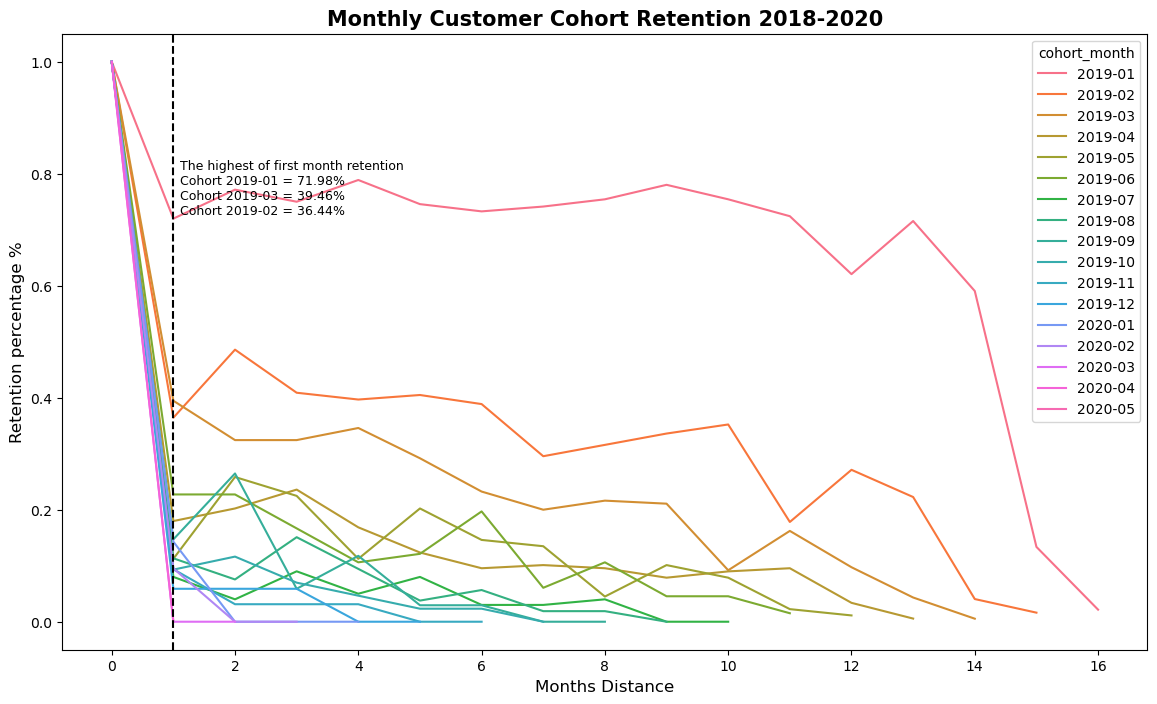

In [17]:
import matplotlib.ticker as mticker


# dengan alternatif
plt.figure(figsize=(14, 8))
# line plot
sns.lineplot(data=lineplot1, x='period_distance', y='percentage', hue='cohort_month')
plt.title('Monthly Customer Cohort Retention 2018-2020', fontsize=15, fontweight='bold')

# vertical line
plt.axvline(x=1, color='black', linestyle='--')

# anotasi
top_3 = lineplot1[lineplot1['period_distance'] == 1].sort_values(by='percentage', ascending=False).head()
top_3_name = top_3['cohort_month'].to_list()
top_3_percentage = top_3['percentage'].to_list()


# string anotasi
text = f'''
The highest of first month retention
Cohort {top_3_name[0]} = {top_3_percentage[0]:.2%}
Cohort {top_3_name[1]} = {top_3_percentage[1]:.2%}
Cohort {top_3_name[2]} = {top_3_percentage[2]:.2%}
'''

plt.text(1.1,0.7, text, fontsize=9)

plt.xlabel('Months Distance', fontsize=12)
plt.ylabel('Retention percentage %', fontsize=12)
plt.show()

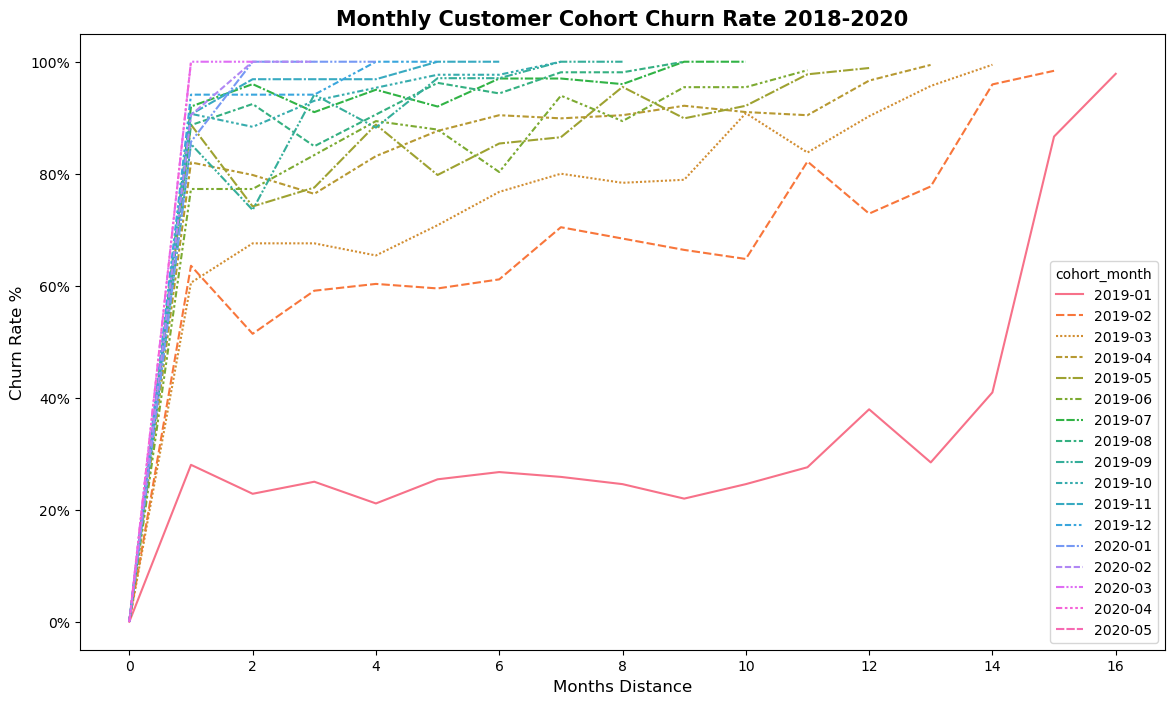

In [18]:
import matplotlib.ticker as mticker


churn_rate = 1 - cohort_retention_final

# Membuat line plot dengan seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=churn_rate.T)

# Menambahkan judul dan label sumbu
plt.title('Monthly Customer Cohort Churn Rate 2018-2020', fontsize=15, fontweight='bold')
plt.xlabel('Months Distance', fontsize=12)
plt.ylabel('Churn Rate %', fontsize=12)

# Menyesuaikan tampilan sumbu y menjadi persentase
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1))

# Menampilkan plot
plt.show()

## 7. Insight
Dari analisis cohort retensi dan visualisasi, kita bisa mendapatkan beberapa wawasan kunci:
1. **Retensi Awal**: Tingkat retensi pada bulan pertama bervariasi antar cohort. Mengidentifikasi cohort dengan retensi awal tertinggi dapat membantu memahami faktor-faktor yang menyebabkan retensi awal yang kuat. Misalnya, kampanye pemasaran tertentu, penawaran produk, atau pengalaman pengguna pertama yang positif.

2. **Tren Penurunan Retensi**: Meskipun tingkat retensi cenderung menurun seiring waktu, tingkat penurunannya berbeda-beda untuk setiap cohort. Cohort yang menunjukkan penurunan retensi yang lebih lambat mengindikasikan adanya pelanggan yang lebih loyal. Menganalisis perilaku pelanggan dalam cohort ini dapat memberikan wawasan tentang strategi retensi yang efektif.

3. **Cohort dengan Retensi Tinggi**: Beberapa cohort menunjukkan tingkat retensi yang lebih tinggi karena pengaruh musiman atau kampanye pemasaran khusus. Analisis lebih lanjut terhadap periode waktu tertentu atau kegiatan pemasaran yang dilakukan dapat membantu mengidentifikasi faktor-faktor yang berkontribusi terhadap peningkatan retensi pada cohort tersebut.

4. **Strategi Keterlibatan Pelanggan yang Berhasil**: Cohort yang mempertahankan tingkat retensi tinggi dalam jangka waktu yang panjang menunjukkan keberhasilan strategi keterlibatan pelanggan. Strategi-strategi ini, seperti program loyalitas, interaksi pelanggan yang personal, atau layanan pelanggan yang superior, dapat diterapkan pada cohort lain untuk meningkatkan retensi secara keseluruhan.

## Kesimpulan

Analisis retensi cohort yang dilakukan memberikan wawasan penting bagi perusahaan dalam memahami pola perilaku pelanggan dari waktu ke waktu. Berikut adalah poin-poin utama dari kesimpulan analisis ini:

1. **Identifikasi Pola Retensi Pelanggan:**
   - Analisis cohort membantu mengidentifikasi pola retensi pelanggan berdasarkan bulan pertama mereka melakukan transaksi. Ini memungkinkan perusahaan untuk melihat bagaimana pelanggan dari berbagai periode waktu bertahan dan berinteraksi dengan produk atau layanan yang ditawarkan.

2. **Penurunan Retensi dari Waktu ke Waktu:**
   - Data menunjukkan adanya tren penurunan tingkat retensi pelanggan dari waktu ke waktu. Cohort yang lebih baru cenderung memiliki tingkat retensi yang lebih rendah dibandingkan cohort yang lebih lama. Ini menunjukkan perlunya strategi retensi yang lebih efektif untuk pelanggan baru.

3. **Strategi Keterlibatan Pelanggan yang Berhasil:**
   - Beberapa cohort menunjukkan tingkat retensi yang tinggi dalam jangka panjang, yang menunjukkan keberhasilan strategi keterlibatan pelanggan yang diterapkan. Program loyalitas, layanan pelanggan yang baik, dan penawaran produk berkualitas tinggi adalah beberapa faktor yang mungkin berkontribusi pada keberhasilan ini.

4. **Rekomendasi untuk Meningkatkan Retensi:**
   - Berdasarkan analisis ini, direkomendasikan agar perusahaan melakukan analisis lebih lanjut terhadap cohort dengan retensi tinggi untuk memahami faktor keberhasilan dan mencoba mereplikasi strategi tersebut ke cohort lain.
   - Implementasi strategi retensi yang lebih proaktif untuk cohort dengan penurunan retensi yang cepat, seperti penawaran khusus dan program keterlibatan pelanggan yang lebih intensif, dapat membantu meningkatkan tingkat retensi secara keseluruhan.

4. **Pemantauan dan Penyesuaian Berkelanjutan:**
   - Retensi pelanggan adalah metrik yang dinamis dan memerlukan pemantauan serta penyesuaian terus-menerus. Dengan pemantauan berkelanjutan dan penyesuaian strategi berdasarkan data terbaru, perusahaan dapat terus meningkatkan loyalitas pelanggan dan profitabilitas jangka panjang.

Dengan mengikuti rekomendasi ini, perusahaan dapat meningkatkan tingkat retensi pelanggan mereka, yang pada akhirnya akan meningkatkan loyalitas pelanggan dan profitabilitas jangka panjang. Analisis cohort menyediakan alat yang kuat untuk memahami dan meningkatkan hubungan jangka panjang dengan pelanggan.

## Rekomendasi

Berdasarkan hasil analisis ini, beberapa rekomendasi yang dapat diambil oleh perusahaan adalah:

1. **Analisis Lebih Lanjut untuk Cohort dengan Retensi Tinggi**:
   - Lakukan analisis lebih lanjut untuk memahami faktor-faktor yang menyebabkan tingkat retensi tinggi pada cohort tertentu, seperti promosi, penawaran produk, atau layanan pelanggan.

2. **Replikasi Strategi yang Berhasil**:
   - Replikasi strategi yang berhasil diterapkan pada cohort dengan retensi tinggi ke cohort lain. Misalnya, memperluas program loyalitas yang terbukti efektif.

3. **Peningkatan Strategi Retensi**:
   - Implementasi strategi retensi yang lebih proaktif untuk cohort yang menunjukkan penurunan retensi yang cepat, seperti penawaran khusus, diskon, atau program keterlibatan pelanggan yang lebih intensif.

4. **Pemantauan dan Penyesuaian Terus Menerus**:
   - Terus memantau dan menyesuaikan strategi retensi berdasarkan data dan analisis yang diperoleh, untuk meningkatkan tingkat retensi pelanggan secara keseluruhan.

Dengan mengikuti rekomendasi ini, perusahaan dapat meningkatkan tingkat retensi pelanggan mereka, yang pada akhirnya akan meningkatkan loyalitas pelanggan dan profitabilitas jangka panjang.

In [19]:
cohort_retention_final.to_csv('cohort_retention_pivot.csv')
lineplot1.to_csv('lineplot_percent.csv')